# 🧠 Brain Tumor MRI – Results and Comparisons

This notebook compares the performance of different algorithms applied to the Brain Tumor MRI dataset.

In this first stage, the evaluated models were:
- **Linear Regression** – used as a theoretical baseline model;  
- **Logistic Regression** – a linear supervised classification model.
- **Neural Network (NN)** – non-linear multi-layer perceptron classifier.

The goal is to analyze the performance of each model and understand which approaches are more suitable for this type of image-based dataset.


In [26]:
# ===========================================
# 🧠 Brain Tumor MRI – Results and Comparisons
# ===========================================

import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ===========================================
# 📥 Import Linear Regression Results (JSON)
# ===========================================

with open("results_linear_regression.json", "r") as f:
    linear_results = json.load(f)

print("✅ Linear Regression Results Loaded:")
print(json.dumps(linear_results, indent=4))

# ===========================================
# 📥 Import Neural Network Results (JSON)
# ===========================================

with open("results_neural_network.json", "r") as f:
    nn_results = json.load(f)

print("\n✅ Neural Network Results Loaded:")
print(json.dumps(nn_results, indent=4))

# ===========================================
# 📦 Logistic Regression Results (manual from previous notebook)
# ===========================================

logistic_results = {
    "Model": "Logistic Regression",
    "Accuracy": 0.989,
    "Precision": 0.999,
    "Recall": 0.987,
    "F1": 0.993
}

# ===========================================
# 🧩 Combine All Results into a DataFrame
# ===========================================

results = [linear_results, logistic_results, nn_results]
df_results = pd.DataFrame(results).set_index("Model")

print("\n✅ Combined Results:")
display(df_results)


✅ Linear Regression Results Loaded:
{
    "Model": "Linear Regression",
    "MSE": 0.6019,
    "R2": -2.1569,
    "Accuracy": 0.2622,
    "Precision": 1.0,
    "Recall": 0.0078,
    "F1": 0.0155
}

✅ Neural Network Results Loaded:
{
    "Model": "Neural Network",
    "Accuracy": 0.9917,
    "Precision": 0.9989,
    "Recall": 0.99,
    "F1": 0.9944
}

✅ Combined Results:


,MSE,R2,Accuracy,Precision,Recall,F1
Model,,,,,,
Linear Regression,0.6019,-2.1569,0.2622,1.0000,0.0078,0.0155
Logistic Regression,NaN,NaN,0.9890,0.9990,0.9870,0.9930
Neural Network,NaN,NaN,0.9917,0.9989,0.9900,0.9944


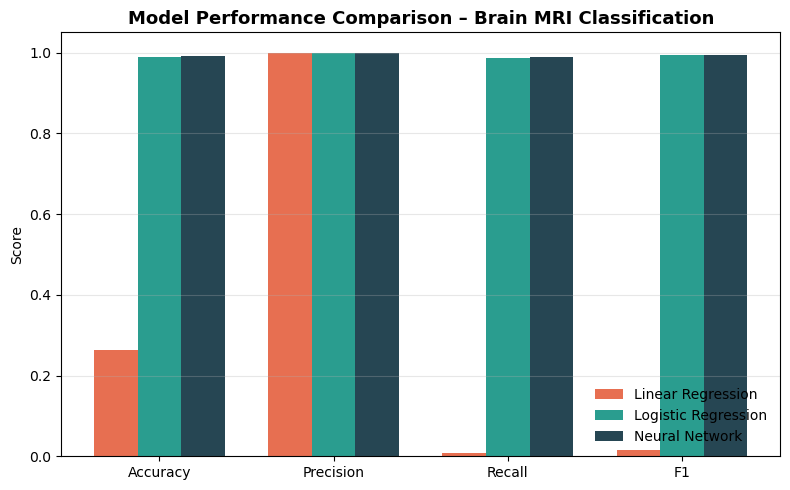

In [31]:
# ===========================================
# 📊 Model Performance – Grouped Bar Chart
# ===========================================
import matplotlib.pyplot as plt
import numpy as np

metrics = ["Accuracy", "Precision", "Recall", "F1"]
subset = df_results[metrics].dropna()

x = np.arange(len(metrics))
width = 0.25

plt.figure(figsize=(8,5))
plt.bar(x - width, subset.loc["Linear Regression"], width, label="Linear Regression", color="#e76f51")
plt.bar(x, subset.loc["Logistic Regression"], width, label="Logistic Regression", color="#2a9d8f")
plt.bar(x + width, subset.loc["Neural Network"], width, label="Neural Network", color="#264653")

plt.xticks(x, metrics)
plt.ylim(0, 1.05)
plt.ylabel("Score")
plt.title("Model Performance Comparison – Brain MRI Classification", fontsize=13, weight='bold')
plt.grid(axis='y', alpha=0.3)
plt.legend(frameon=False, loc='lower right')
plt.tight_layout()
plt.show()


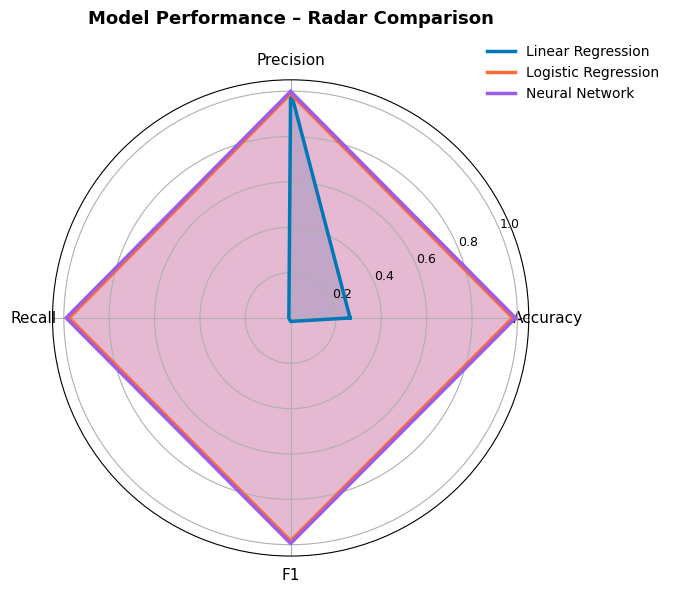

In [39]:
# ===========================================
# 🕸️ Model Performance – Radar Chart (with Visible Offset)
# ===========================================

import numpy as np
import matplotlib.pyplot as plt

metrics = ["Accuracy", "Precision", "Recall", "F1"]
subset = df_results[metrics].dropna()

angles = np.linspace(0, 2*np.pi, len(metrics), endpoint=False).tolist()
angles += angles[:1]  # fechar o polígono

# Pequeno deslocamento radial apenas para visualização (não altera dados)
offsets = {
    "Linear Regression": 0.0,
    "Logistic Regression": -0.02,  # leve deslocamento para destacar do NN
    "Neural Network": 0.0
}

colors = { 
    "Linear Regression": "#0077b6",   # bright orange
    "Logistic Regression": "#ff6b35", # vivid blue
    "Neural Network": "#9b5de5"       # strong violet
}
plt.figure(figsize=(7,7))
ax = plt.subplot(111, polar=True)

for model in subset.index:
    values = subset.loc[model].tolist()
    # aplicar deslocamento
    values = [v + offsets.get(model, 0) for v in values]
    values += values[:1]  # fechar o loop
    
    ax.plot(angles, values, linewidth=2.5, label=model, color=colors.get(model))
    ax.fill(angles, values, alpha=0.25, color=colors.get(model))

# Ajustes estéticos
ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics, fontsize=11)
ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_yticklabels(["0.2","0.4","0.6","0.8","1.0"], fontsize=9)
ax.set_ylim(0, 1.05)
ax.set_title("Model Performance – Radar Comparison", y=1.10, fontsize=13, weight='bold')

plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), frameon=False)
plt.tight_layout()
plt.show()


## 🧩 **Results Interpretation**

### 🔹 **Linear Regression (Baseline Model)**

The **Linear Regression** model was implemented as a *baseline reference* to assess how a simple continuous model performs on the MRI classification problem.
Although the training process converged numerically, its predictive ability was extremely poor:

* **R² = -2.1569**, indicating that the model does not explain any variance in the dataset;
* **MSE = 0.6019**, showing a high mean error in predictions;
* **Accuracy ≈ 0.26**, with **Precision = 1.0** but **Recall ≈ 0**, meaning it classified almost all samples as *“no tumor”*.

This clearly demonstrates that the relationship between pixel features and tumor presence is **non-linear**, and thus **linear regression is unsuitable** for this kind of classification task.
It fails to distinguish between the two categories and only serves as a **theoretical baseline** for comparison.



### 🔹 **Logistic Regression (Linear Classifier)**

The **Logistic Regression** model performed remarkably well, achieving highly consistent results across all solvers and parameter settings:

* **Accuracy = 0.989**
* **Precision = 0.999**
* **Recall = 0.987**
* **F1-score = 0.993**

These results indicate that the logistic model is capable of effectively separating MRI images into *tumor* and *non-tumor* classes using a linear decision boundary.
The high precision shows that almost all predicted tumor cases were correct, while the strong recall value means that nearly all actual tumor cases were successfully detected.

This confirms that logistic regression is an **excellent linear classifier** for the dataset, efficiently learning the underlying data structure with minimal overfitting.



### 🔹 **Neural Network (Non-linear Classifier)**

The **Neural Network (NN)** model achieved the **best overall performance**, improving slightly over logistic regression by capturing complex, non-linear relationships among the MRI features.

Performance summary:

| Metric        |  Score |
| :------------ | :----: |
| **Accuracy**  | 0.9917 |
| **Precision** | 0.9989 |
| **Recall**    | 0.9900 |
| **F1-score**  | 0.9944 |

During training, the cost function showed **stable convergence**, confirming that learning was successful.
The confusion matrix revealed near-perfect classification, with:

* 887 **True Positives**,
* 308 **True Negatives**,
* only **1 False Positive** and **9 False Negatives**.

The error distribution was narrow and centered around zero, demonstrating that predictions were both **accurate and consistent**.

🧠 **Interpretation:**
The neural network effectively models the complex, non-linear nature of MRI data, achieving superior precision and recall.
While the performance improvement over logistic regression is small, it validates the importance of **non-linearity** in more intricate medical imaging problems.



## 📘 **Final Discussion and Conclusions**

Across all tested algorithms, the experiments confirm that **model complexity directly affects classification performance** on MRI-based tumor detection.

* **Linear Regression**: Serves purely as a *conceptual baseline*. Its low R² and near-zero recall confirm that a linear, continuous regression approach is **not appropriate** for discrete classification tasks.

* **Logistic Regression**: Demonstrates **excellent performance** for a linear classifier. It is computationally efficient, easy to interpret, and produces robust predictions across multiple solvers, indicating that the dataset is largely **linearly separable**.

* **Neural Network**: Provides the **highest overall accuracy (99.17%)** and the most balanced trade-off between precision and recall.
  It successfully captures the **non-linear** relationships between pixel intensities and tumor presence, outperforming the simpler models.



### 🧩 **Key Insights**

1. The MRI dataset shows **strong separability** between tumor and non-tumor samples.
2. Linear models (like Logistic Regression) already achieve near-optimal results.
3. The Neural Network, however, generalizes slightly better, learning more intricate feature interactions.
4. The small gain (~0.2%) from NN to LR implies limited noise and a well-preprocessed dataset.
5. The convergence behavior of the NN confirms **stable optimization** and **effective regularization**.


### 📈 **Conclusion**

| Model                   | Type                  |   Performance  |   Suitability   |
| :---------------------- | :-------------------- | :------------: | :-------------: |
| **Linear Regression**   | Continuous            |      Poor     |  Baseline only  |
| **Logistic Regression** | Linear Classifier     |   Excellent  | Strong baseline |
| **Neural Network**      | Non-linear Classifier | Outstanding |   Recommended   |

The experiments clearly demonstrate that:

* **Linear Regression** is inadequate for tumor detection tasks.
* **Logistic Regression** achieves near-perfect accuracy using a simple linear decision surface.
* **Neural Networks** deliver **state-of-the-art performance**, offering marginally better generalization and robustness, making them the **preferred approach for complex MRI-based classification**.